# SVM for classification

Load IRIS dataset, check its contents:


In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [4]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [5]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [6]:
import numpy as np

# берем только первые два признака
X = iris.data[:, :2]
y = iris.target

# оставляем только классы 0 и 1
mask = y != 2
X = X[mask]
y = y[mask]

print(X.shape)
print(y.shape)

(100, 2)
(100,)


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

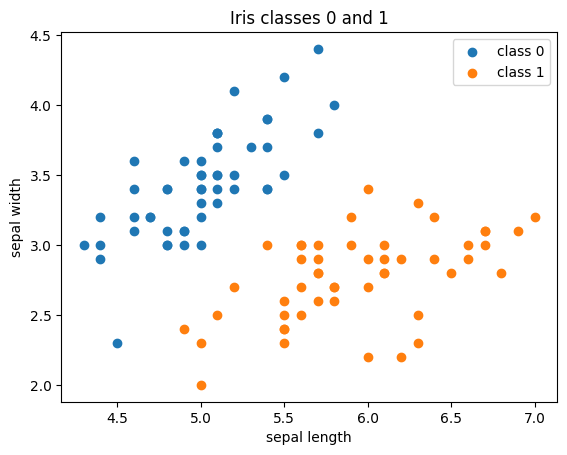

In [7]:
import matplotlib.pyplot as plt
plt.figure()

plt.scatter(X[y==0, 0], X[y==0, 1], label='class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], label='class 1')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.title('Iris classes 0 and 1')
plt.show()


Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# SVM с разными C
model1 = SVC(kernel='linear', C=1)
model1.fit(X_train, y_train)

model2 = SVC(kernel='linear', C=200)
model2.fit(X_train, y_train)

print("Accuracy C=1:", model1.score(X_test, y_test))
print("Accuracy C=200:", model2.score(X_test, y_test))

Accuracy C=1: 1.0
Accuracy C=200: 1.0


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

Accuracy: 1.0


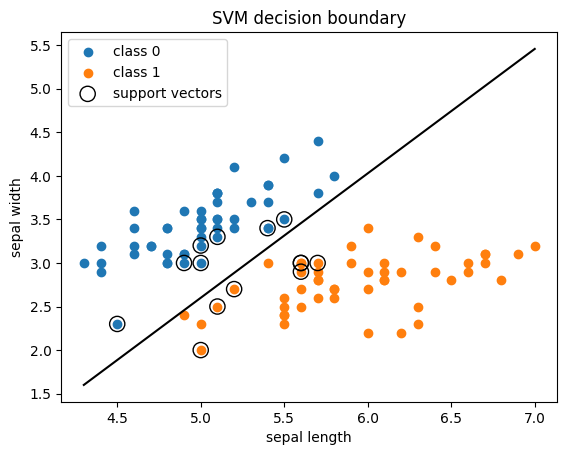

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 1) 2 признака + только классы 0 и 1
X = iris.data[:, :2]
y = iris.target
mask = y != 2
X = X[mask]
y = y[mask]

# 2) train/test и обучение
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

SVMmodel = SVC(kernel='linear', C=1)
SVMmodel.fit(X_train, y_train)

print("Accuracy:", SVMmodel.score(X_test, y_test))

# 3) support vectors + линия w0*x0 + w1*x1 + b = 0
supvectors = SVMmodel.support_vectors_
w = SVMmodel.coef_[0]
b = SVMmodel.intercept_[0]

plt.figure()
plt.scatter(X[y==0, 0], X[y==0, 1], label='class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], label='class 1')
plt.scatter(supvectors[:, 0], supvectors[:, 1],
            s=120, facecolors='none', edgecolors='k',
            label='support vectors')

x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)
y_vals = -(w[0]*x_vals + b) / w[1]
plt.plot(x_vals, y_vals, 'k-')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('SVM decision boundary')
plt.legend()
plt.show()

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

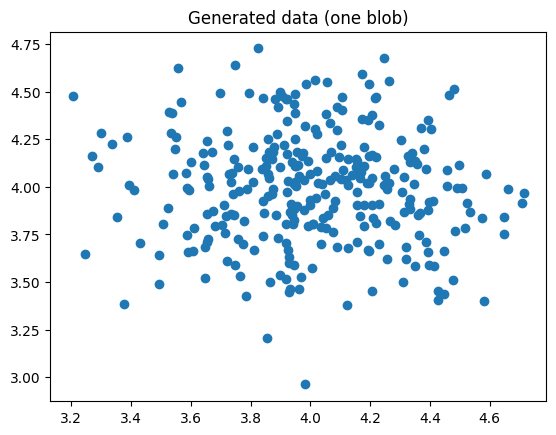

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)

x, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.3, center_box=(4, 4))

plt.scatter(x[:, 0], x[:, 1])
plt.title("Generated data (one blob)")
plt.show()

Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

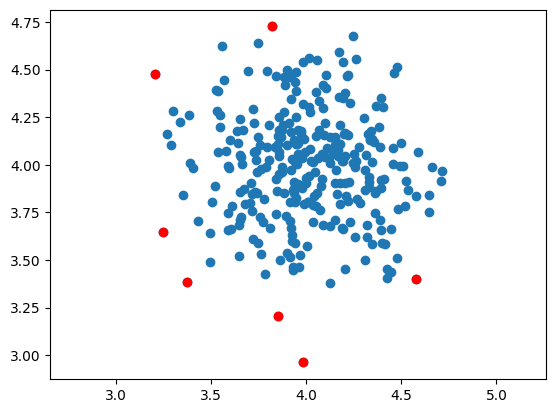

In [14]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

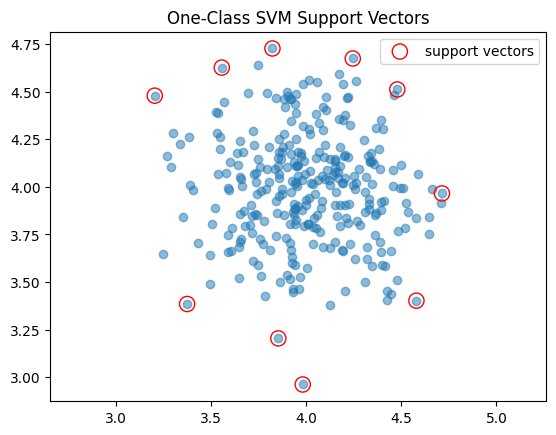

In [15]:
# support vectors
supvectors = SVMmodelOne.support_vectors_

plt.figure()

# все точки
plt.scatter(x[:, 0], x[:, 1], alpha=0.5)

# support vectors
plt.scatter(supvectors[:, 0], supvectors[:, 1],
            s=120, facecolors='none', edgecolors='red',
            label='support vectors')

plt.title("One-Class SVM Support Vectors")
plt.legend()
plt.axis('equal')
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.989098620408397


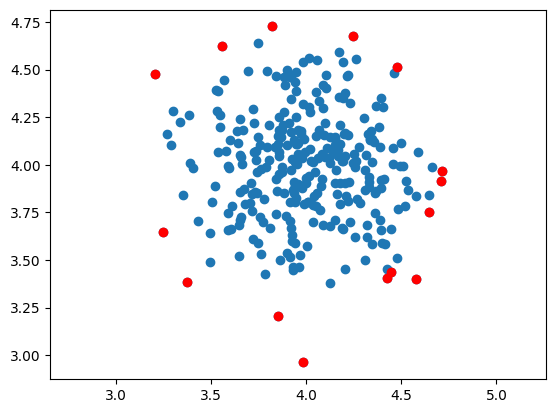

In [17]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.05)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()